In [1]:
import datetime as dt

from backtester import DynamicDeltaHedgeStrategy

In [2]:
fx_pair = 'EURUSD'
start_test = dt.datetime(year=2022, month=4, day=1)
end_test = dt.datetime(year=2022, month=10, day=1)
fixed_vol = True

backtest = DynamicDeltaHedgeStrategy(asset=fx_pair, rf_base_ccy=0.004, rf_second_ccy=0.025,
                                     datetime_start=start_test, datetime_end=end_test,
                                     onshore_spread=0, offshore_spread=0)

In [3]:
DAYS_STRATEGY = 30

In [4]:
backtest.backtest(days_strategy=DAYS_STRATEGY, use_fixed_vol=fixed_vol)

/home/ruabcvd/.local/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ruabcvd/.local/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ruabcvd/.local/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
print(f'Hist vols: {backtest.hist_vols}')

Hist vols: [(0.3151727509738438, 0.12423969489729902), (0.18761195234016387, nan), (0.18287442761455994, 0.06315503599260437), (0.1794564300707896, 0.1155274092931086), (0.1866703144178019, 0.108693734316965), (0.1813055033231141, 0.11450698840984015), (0.17680349373957172, 0.12876606251271738), (0.17831427309016412, 0.13853800703495917), (0.1838882668627714, 0.13544839757508662), (0.178737038272298, 0.13114147191283648), (0.1737296533813306, 0.1285434272059855), (0.1710893439099784, 0.1271611471235384), (0.16458776444439982, 0.13096905084157123), (0.12048088592793335, 0.12870749014953098), (0.09344206411093835, 0.12651673086650042), (0.09372159713001094, 0.12451001374820231), (0.09463538037825524, 0.12389358606846539), (0.09610558688749857, 0.1232190083721383), (0.1004538691604079, 0.12198646061538246), (0.09858252361014097, 0.1193516451918509), (0.10448803906968783, 0.12248389383198141), (0.10637407805252795, 0.12282676750550216), (0.10827058454176457, 0.1211670485702937), (0.1095378

In [6]:
pnl_distr = ['{:+,.2f}'.format(p) for p in backtest.pnl_distribution_by_trades]
print(f'PnL distribution: {pnl_distr}')

PnL distribution: ['+23,637.35', '-7,489.73', '-3,653.74', '-9,329.36', '-1,642.52', '-1,425.09', '-1,400.94', '+2,192.71', '-3,841.52', '-1,618.68', '-1,548.12', '+455.66', '-1,867.64', '-5,686.86', '-3,371.34', '-2,627.71', '-3,616.73', '+2,435.37', '-3,084.85', '-3,525.95', '-2,113.82', '-3,304.85', '+3,045.87', '+16,837.09', '+10,962.12', '+5,594.86', '+6,658.20', '-306.78', '-3,490.11', '-6,474.31', '-12,695.71', '-9,260.70', '-2,568.32', '-2,100.90', '-370.97', '-8,826.01', '-10,918.93']


In [7]:
print('Total PnL = {:+,.2f}'.format(backtest.pnl_total))
print('Average per trade = {:+,.2f}'.format(backtest.pnl_mean))
print('t-statistic = {:.2f}\n'.format(backtest.t_statistic))
print('p-value = {:.2f}\n'.format(backtest.t_test_p_value))

Total PnL = -46,342.95
Average per trade = -1,252.51
t-statistic = -1.09

p-value = 0.86



In [8]:
len(backtest.opts_to_compare)

78

In [9]:
len(backtest.delta_hedge_to_compare)

78

In [10]:
[(backtest.delta_hedge_to_compare[i], backtest.opts_to_compare[i]) for i in range(len(backtest.opts_to_compare))]

[(-26950.619848116417, -44344.72552398981),
 (-3313.267216813052, -18356.17882541431),
 (-23169.006585575284, -26897.926400378463),
 (0.0, nan),
 (-23593.210980310512, -26251.065466160446),
 (-31082.937957613274, -9987.664041195856),
 (-19930.407512944643, -25803.323872300734),
 (-23584.143709365526, -17160.89108245281),
 (-19535.82072277115, -26788.9881513123),
 (-28865.184327195777, -16223.560579543086),
 (-27835.999633922125, -26036.84675355433),
 (-29478.523936829988, -17020.91313634884),
 (-23567.952377131413, -25440.847844003398),
 (-24993.045554591234, -18977.278546442052),
 (-24516.008251280564, -25647.26820200404),
 (-25916.94862552403, -20318.356402590147),
 (-17749.711719663926, -26408.86238061129),
 (-15557.006443151056, -19894.32080710679),
 (-15980.949372645218, -25705.031551845197),
 (-19822.464575411897, -19303.251654931104),
 (-16201.218117220487, -25002.468543862622),
 (-17819.89898747897, -18946.727515458584),
 (-18690.44963190526, -24641.978801585272),
 (-20238.5680

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# fig, ax1 = plt.subplots(figsize=(30, 20))
# ax1.bar(list(range(len(backtest.opts_to_compare))), backtest.opts_to_compare, width = 0.3, color = 'red')
# ax1.set_ylabel('Explicit option', fontsize=16)

# ax2 = ax1.twinx()
# ax2.bar(list(range(len(backtest.delta_hedge_to_compare))), backtest.delta_hedge_to_compare, width = 0.3, color = 'blue')
# ax2.set_ylabel('Dynamic Delta Hedge', fontsize=16)

# a,b = -25000, 25000
# ax1.set_ylim(a, b)
# ax2.set_ylim(a, b)

# plt.show()

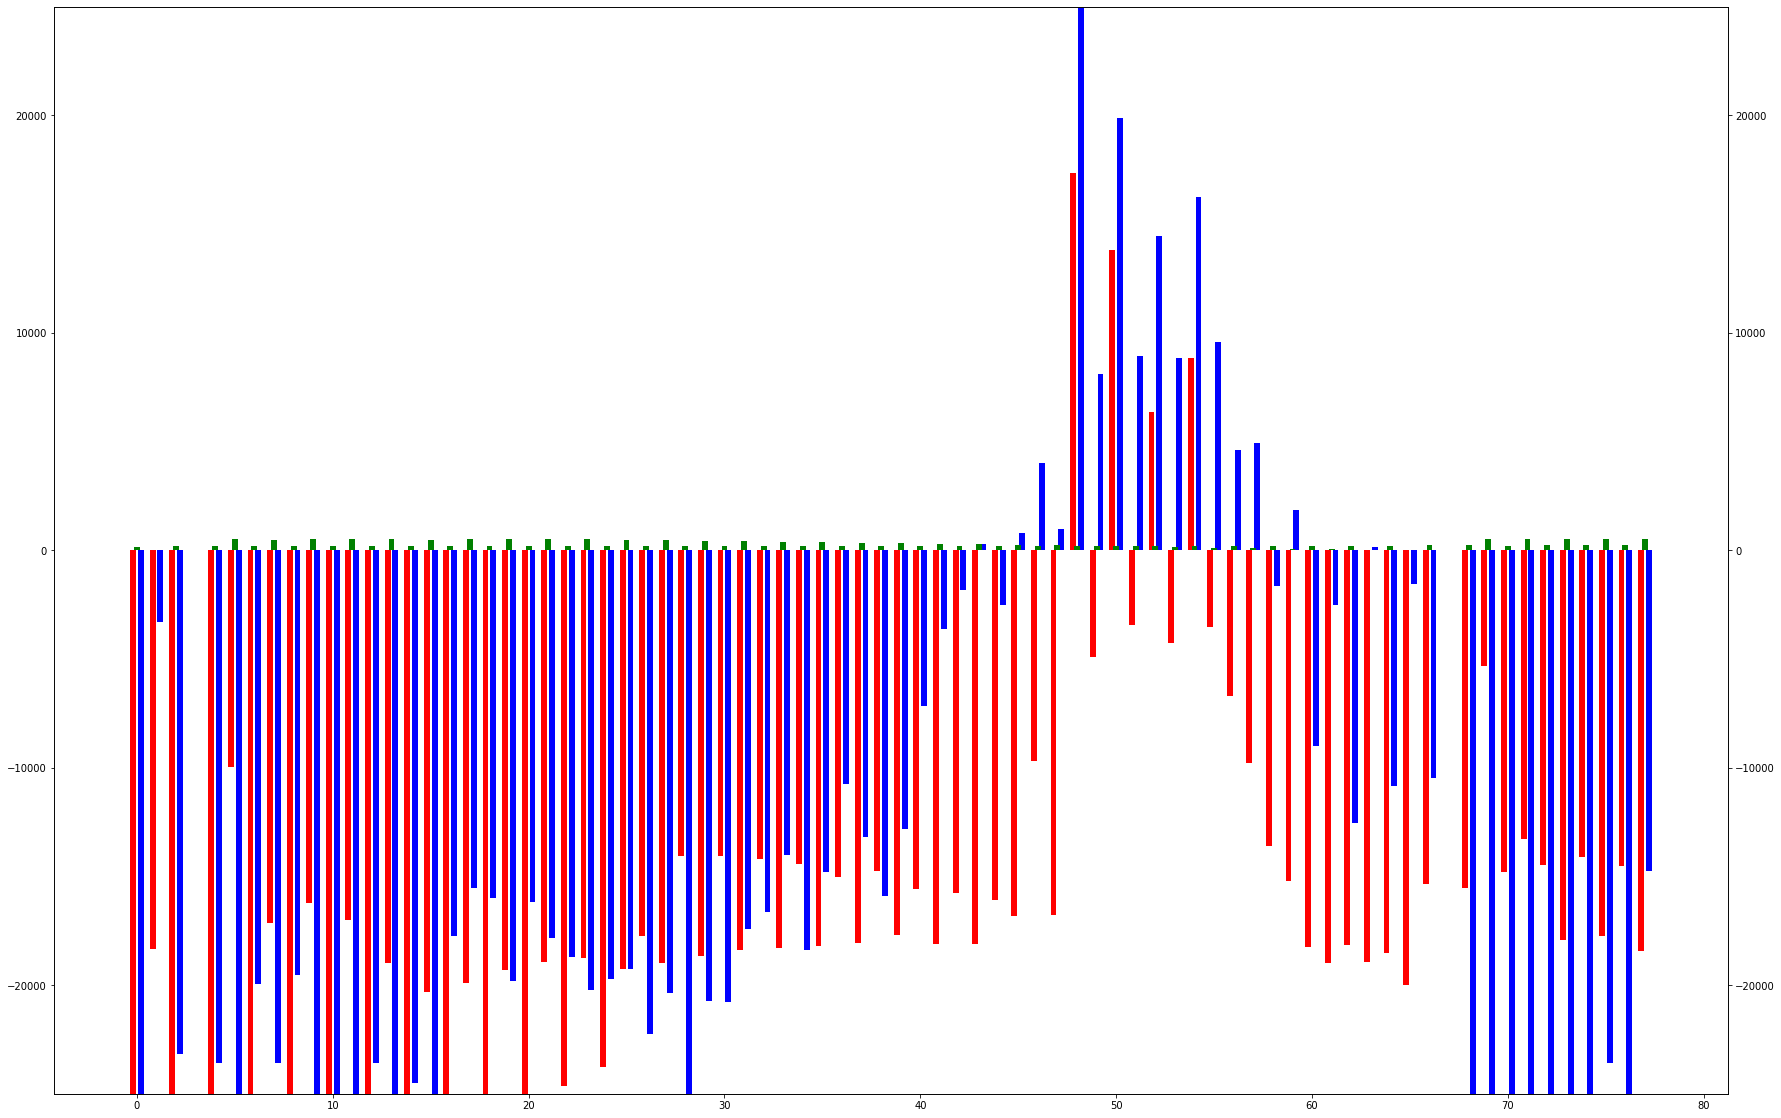

In [20]:
fig, ax = plt.subplots(figsize=(30, 20))

X_axis = np.arange(len(backtest.opts_to_compare))

ax.bar(X_axis - 0.2, backtest.opts_to_compare, width = 0.3, color = 'red')
ax.bar(X_axis + 0.2, backtest.delta_hedge_to_compare, width = 0.3, color = 'blue')

ax2 = ax.twinx()
ax2.bar(list(range(len(backtest.delta_hedge_length))), backtest.delta_hedge_length, width = 0.3, color = 'green')

a,b = -25000, 25000
ax.set_ylim(a, b)
ax2.set_ylim(a, b)

plt.show()

In [14]:
hedging_imperfection = np.array(backtest.opts_to_compare) - np.array(backtest.delta_hedge_to_compare)

In [15]:
hedging_imperfection.shape

(78,)

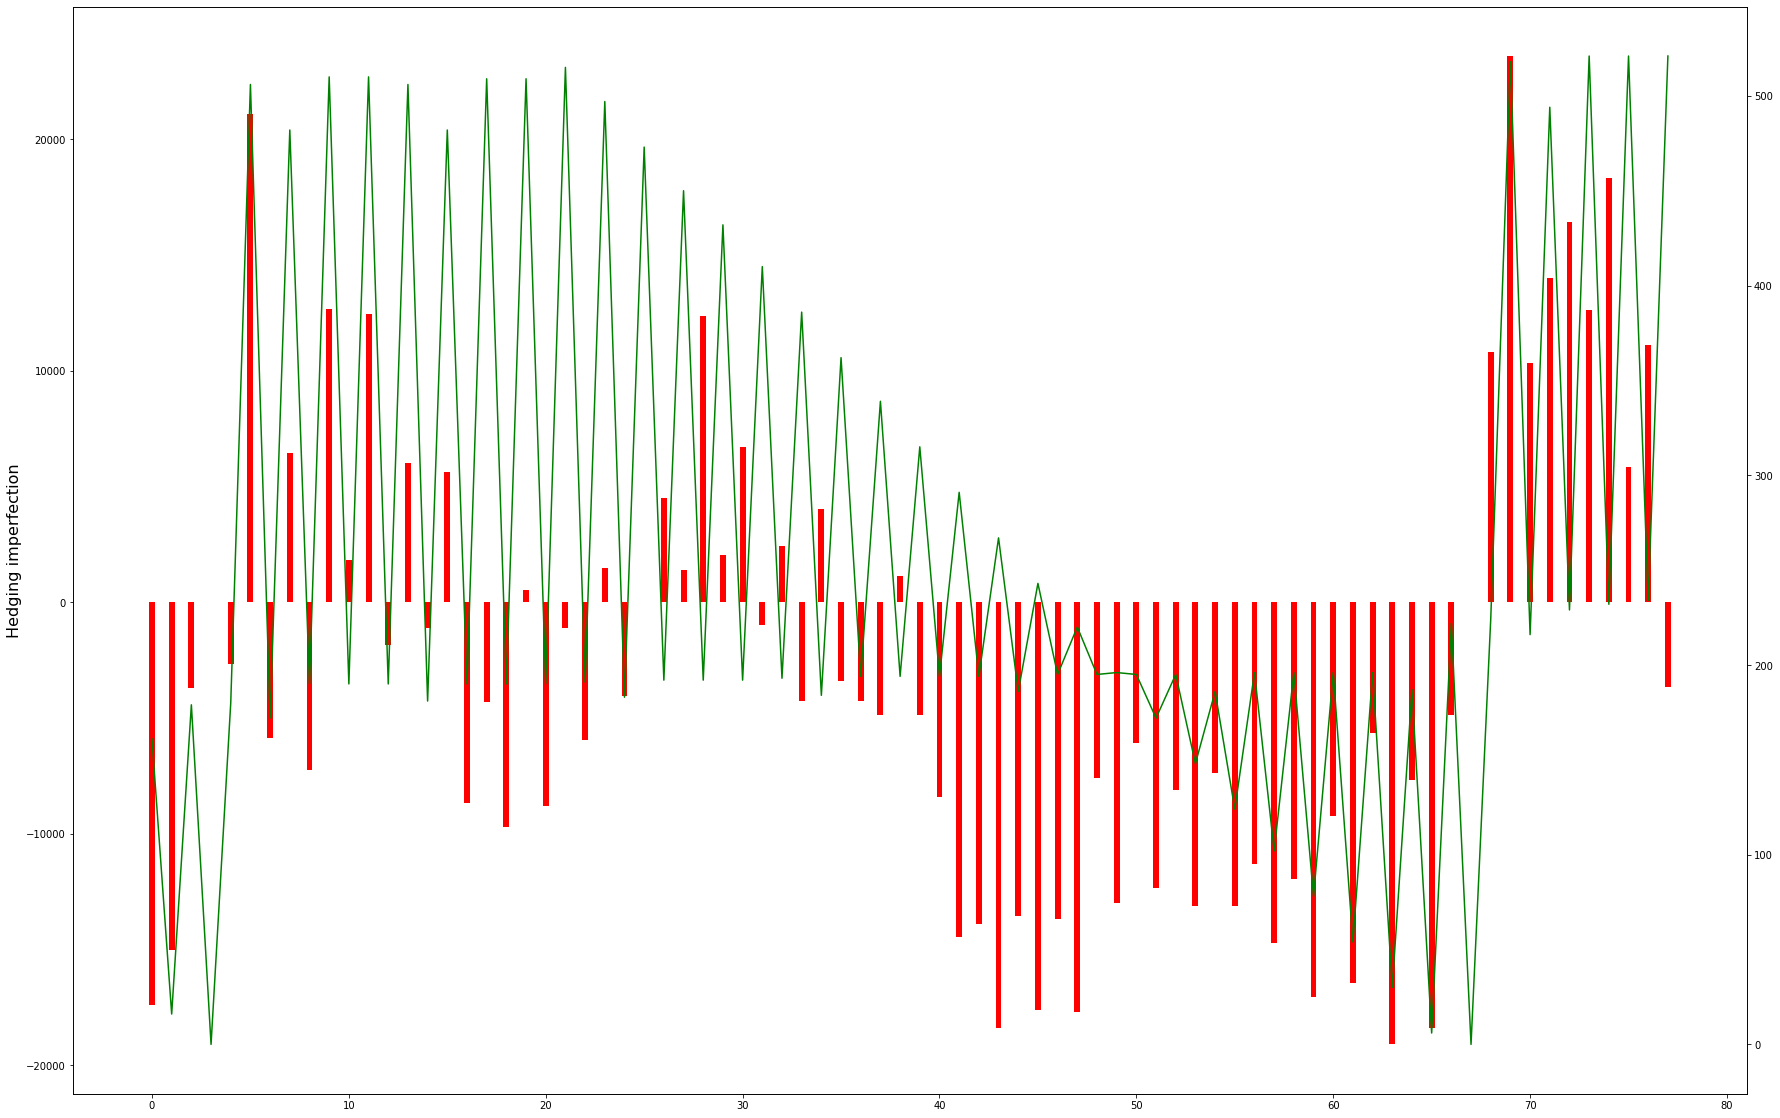

In [22]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.bar(list(range(len(hedging_imperfection))), hedging_imperfection, width = 0.3, color = 'red')
ax.set_ylabel('Hedging imperfection', fontsize=16)

ax2 = ax.twinx()
ax2.plot(list(range(len(backtest.delta_hedge_length))), backtest.delta_hedge_length, color = 'green')

plt.show()